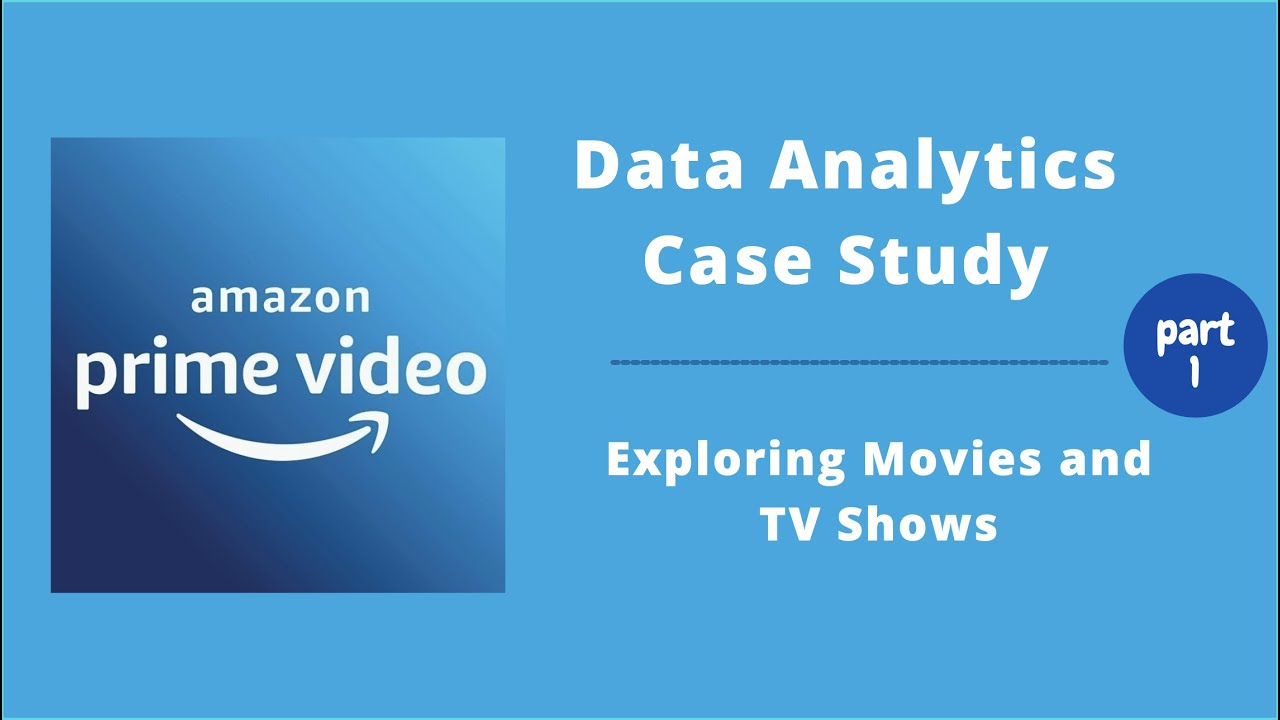

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objs as go
import missingno as msno
from textblob import TextBlob

warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("titles.csv")
df2=pd.read_csv("credits.csv")

## Inspecting data set of titles

In [3]:
df1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400


In [4]:
df1.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
10868,tm1292884,Hunt,MOVIE,"Arjun is the ACP of Hyderabad, who gets involv...",2023,NaN,129,"['action', 'thriller', 'crime']",['IN'],NaN,tt21946058,5.8,1269.0,4.403,4.3
10869,tm1284753,Ennalum Ente Aliya,MOVIE,It tells the story of a teen girl from a Musli...,2023,NaN,113,"['drama', 'comedy']",['IN'],NaN,tt23805304,5.6,812.0,3.406,8.0
10870,tm1303380,Anubhav Singh Bassi: Bas Kar Bassi,MOVIE,"Fresh out of national law university, Bassi ar...",2023,NaN,83,['comedy'],[],NaN,tt26548127,8.3,10.0,1.960,NaN
10871,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,[],[],NaN,NaN,NaN,NaN,1.336,NaN
10872,tm1297385,Chapelle,MOVIE,"In the streets of North Paris, in a famous ghe...",2023,NaN,72,['drama'],[],NaN,tt26025502,NaN,NaN,NaN,NaN


In [5]:
df1.shape

(10873, 15)

In [6]:
df1.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [7]:
unique_show_types = df1['type'].unique()
unique_age_certifications = df1['age_certification'].unique()
unique_genres = df1['genres'].unique()

print("Unique categories in 'show_type':")
print(unique_show_types)

print("\nUnique categories in 'age_certification':")
print(unique_age_certifications)

print("\nUnique categories in 'genres':")
print(unique_genres)

Unique categories in 'show_type':
['MOVIE' 'SHOW']

Unique categories in 'age_certification':
['PG' nan 'TV-PG' 'G' 'PG-13' 'R' 'TV-14' 'TV-Y' 'TV-G' 'TV-Y7' 'NC-17'
 'TV-MA' 'TV-Y7-FV']

Unique categories in 'genres':
["['drama', 'family', 'fantasy', 'romance', 'comedy']" "['comedy', 'war']"
 "['drama', 'romance', 'comedy']" ...
 "['scifi', 'drama', 'fantasy', 'horror']"
 "['comedy', 'drama', 'action', 'romance']"
 "['drama', 'thriller', 'romance', 'music']"]


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10873 entries, 0 to 10872
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10873 non-null  object 
 1   title                 10873 non-null  object 
 2   type                  10873 non-null  object 
 3   description           10729 non-null  object 
 4   release_year          10873 non-null  int64  
 5   age_certification     3688 non-null   object 
 6   runtime               10873 non-null  int64  
 7   genres                10873 non-null  object 
 8   production_countries  10873 non-null  object 
 9   seasons               1551 non-null   float64
 10  imdb_id               10172 non-null  object 
 11  imdb_score            9765 non-null   float64
 12  imdb_votes            9753 non-null   float64
 13  tmdb_popularity       10302 non-null  float64
 14  tmdb_score            8747 non-null   float64
dtypes: float64(5), int6

In [9]:
df1.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,10873.000000,10873.000000,1551.000000,9765.000000,9.753000e+03,10302.000000,8747.000000
mean,2004.077807,85.869033,2.661509,5.970558,8.973232e+03,7.614083,5.977729
std,24.883711,34.156332,3.719633,1.362815,4.897767e+04,45.845289,1.512941
min,1912.000000,0.000000,1.000000,1.100000,5.000000e+00,0.000153,0.500000
25%,2002.000000,65.000000,1.000000,5.100000,1.190000e+02,1.327250,5.066500
50%,2015.000000,89.000000,1.000000,6.100000,4.880000e+02,2.658500,6.000000
75%,2019.000000,102.000000,3.000000,7.000000,2.493000e+03,6.185000,6.983000
max,2023.000000,940.000000,53.000000,9.900000,2.081757e+06,3187.531000,10.000000


In [10]:
df1.duplicated().sum()#No duplicates

0

In [11]:
df1.drop_duplicates(inplace=True)
print("Shape of the DataFrame after removing duplicates:")
print(df1.shape)

Shape of the DataFrame after removing duplicates:
(10873, 15)


## Inspecting Missing Values in the Dataset of Titles

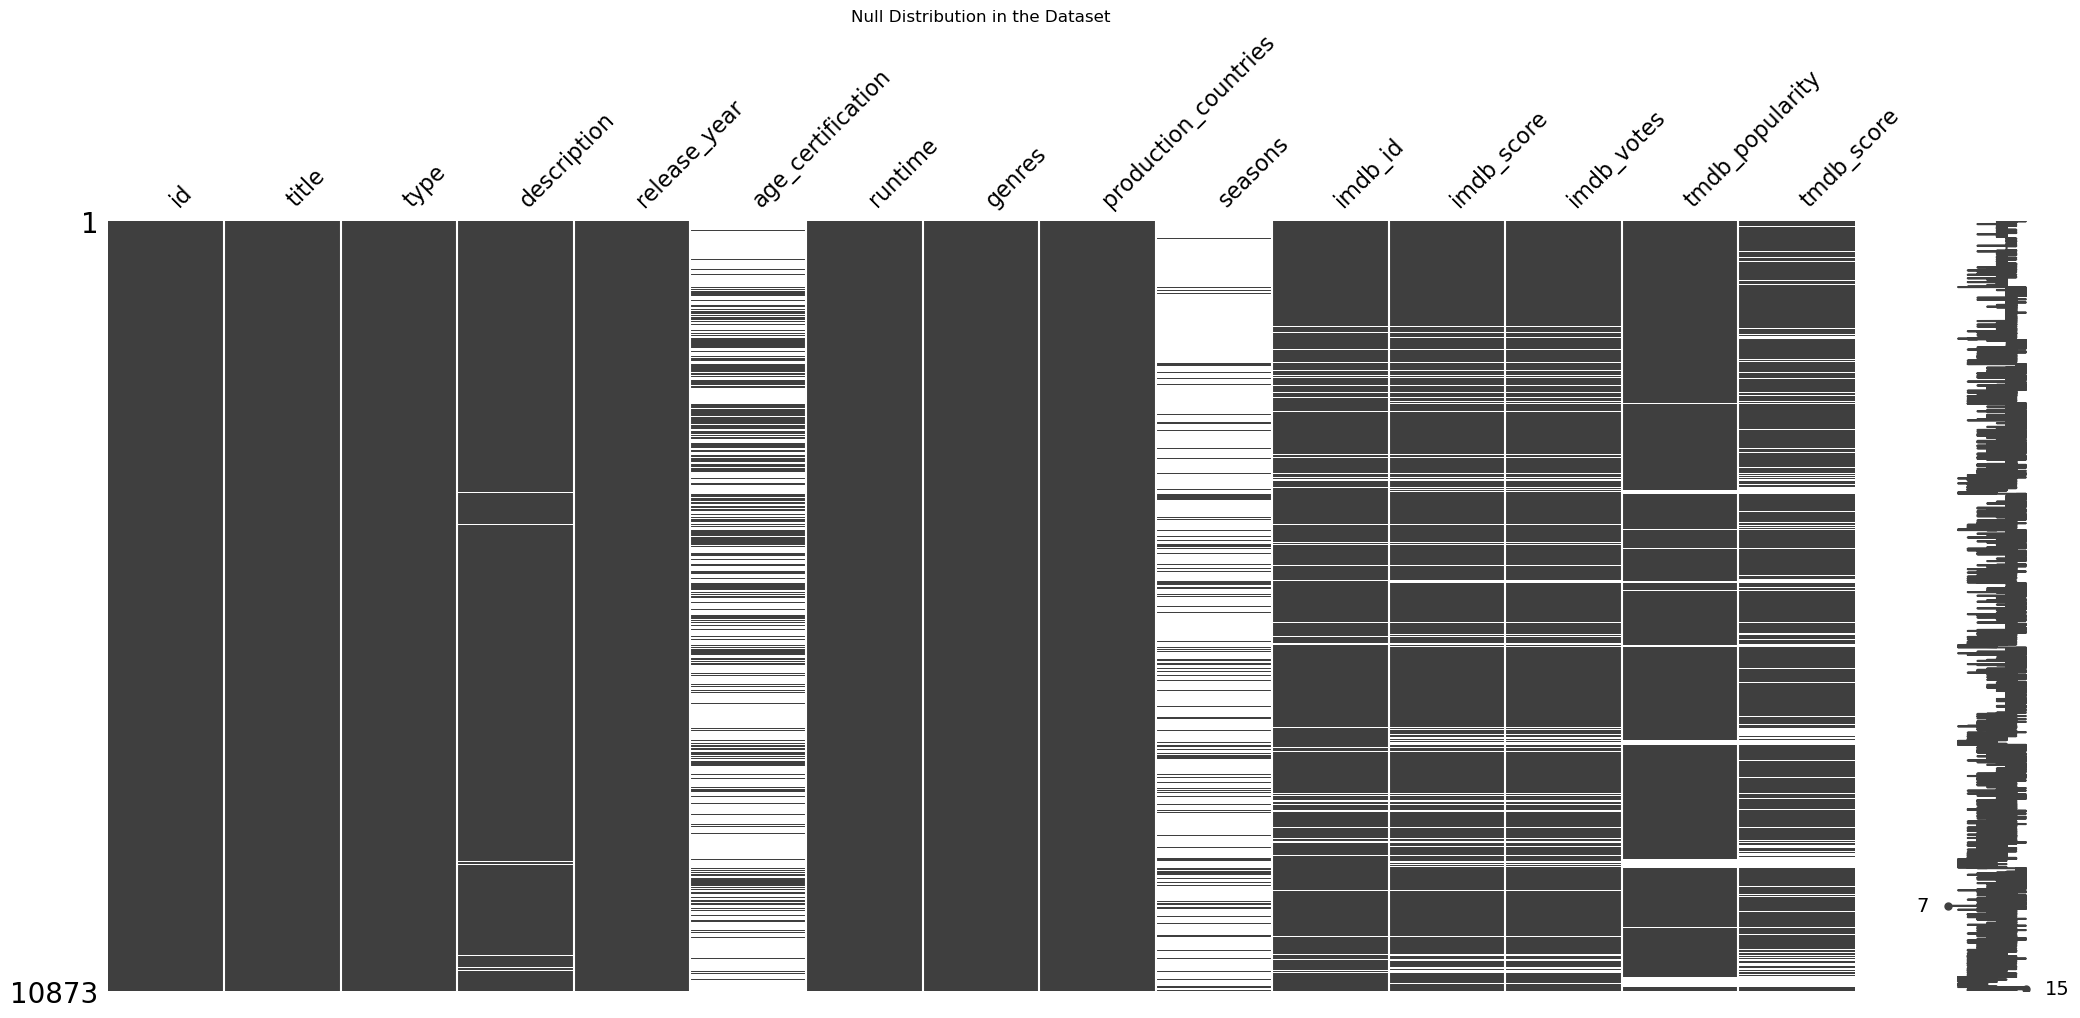

In [12]:
msno.matrix(df1) 
plt.title('Null Distribution in the Dataset')
plt.show()

In [13]:
df1.isnull().sum().sort_values(ascending=False)

seasons                 9322
age_certification       7185
tmdb_score              2126
imdb_votes              1120
imdb_score              1108
imdb_id                  701
tmdb_popularity          571
description              144
id                         0
title                      0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
dtype: int64

In [14]:
round(df1.isnull().sum()/df1.shape[0]*100,2).sort_values(ascending=False)

seasons                 85.74
age_certification       66.08
tmdb_score              19.55
imdb_votes              10.30
imdb_score              10.19
imdb_id                  6.45
tmdb_popularity          5.25
description              1.32
id                       0.00
title                    0.00
type                     0.00
release_year             0.00
runtime                  0.00
genres                   0.00
production_countries     0.00
dtype: float64

In [15]:
df1["genres"].value_counts()

['drama']                                         985
['comedy']                                        805
['documentation']                                 581
['drama', 'romance']                              227
['horror']                                        200
                                                 ... 
['comedy', 'drama', 'music', 'romance', 'war']      1
['drama', 'animation', 'comedy', 'crime']           1
['animation', 'music', 'family', 'comedy']          1
['drama', 'scifi', 'family', 'fantasy']             1
['drama', 'thriller', 'romance', 'music']           1
Name: genres, Length: 2324, dtype: int64

In [16]:
# Top 5 genres
df1["genres"].value_counts().head(5)

['drama']               985
['comedy']              805
['documentation']       581
['drama', 'romance']    227
['horror']              200
Name: genres, dtype: int64

## Inspecting Data set of Credits

In [17]:
df2.head()

,person_id,id,name,character,role
0,25020,tm87233,James Stewart,George Bailey,ACTOR
1,26190,tm87233,Donna Reed,Mary Hatch,ACTOR
2,25653,tm87233,Lionel Barrymore,Mr. Potter,ACTOR
3,13301,tm87233,Thomas Mitchell,Uncle Billy,ACTOR
4,34171,tm87233,Henry Travers,Clarence,ACTOR


In [18]:
df2.tail()

,person_id,id,name,character,role
140548,2616047,tm1307408,Barri Tsavaris,Jeni / Poki / Jojo / Chumli,ACTOR
140549,2030678,tm1307408,Park Yerin,Frido / Tani,ACTOR
140550,1378851,tm1307408,Bommie Han,Pinkfong / Rachel / Jordi,ACTOR
140551,2762736,tm1307408,Sharon Youngmee,Billi / Baker,ACTOR
140552,2724813,tm1307408,Sarah Bock,Coco / Quacki / Shasha / Nina,ACTOR


In [19]:
df2.shape

(140553, 5)

In [20]:
df2.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140553 entries, 0 to 140552
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  140553 non-null  int64 
 1   id         140553 non-null  object
 2   name       140553 non-null  object
 3   character  122705 non-null  object
 4   role       140553 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.4+ MB


In [22]:
df2.describe()

,person_id
count,1.405530e+05
mean,4.894569e+05
std,6.691236e+05
min,1.000000e+00
25%,4.329300e+04
50%,1.511260e+05
75%,6.845330e+05
max,2.771401e+06


In [23]:
df2.duplicated().sum() #No duplicates

0

In [24]:
df2.drop_duplicates(inplace=True)
print("Shape of the DataFrame after removing duplicates:")
print(df2.shape)

Shape of the DataFrame after removing duplicates:
(140553, 5)


## Inspecting Missing Values in the Dataset of Credits

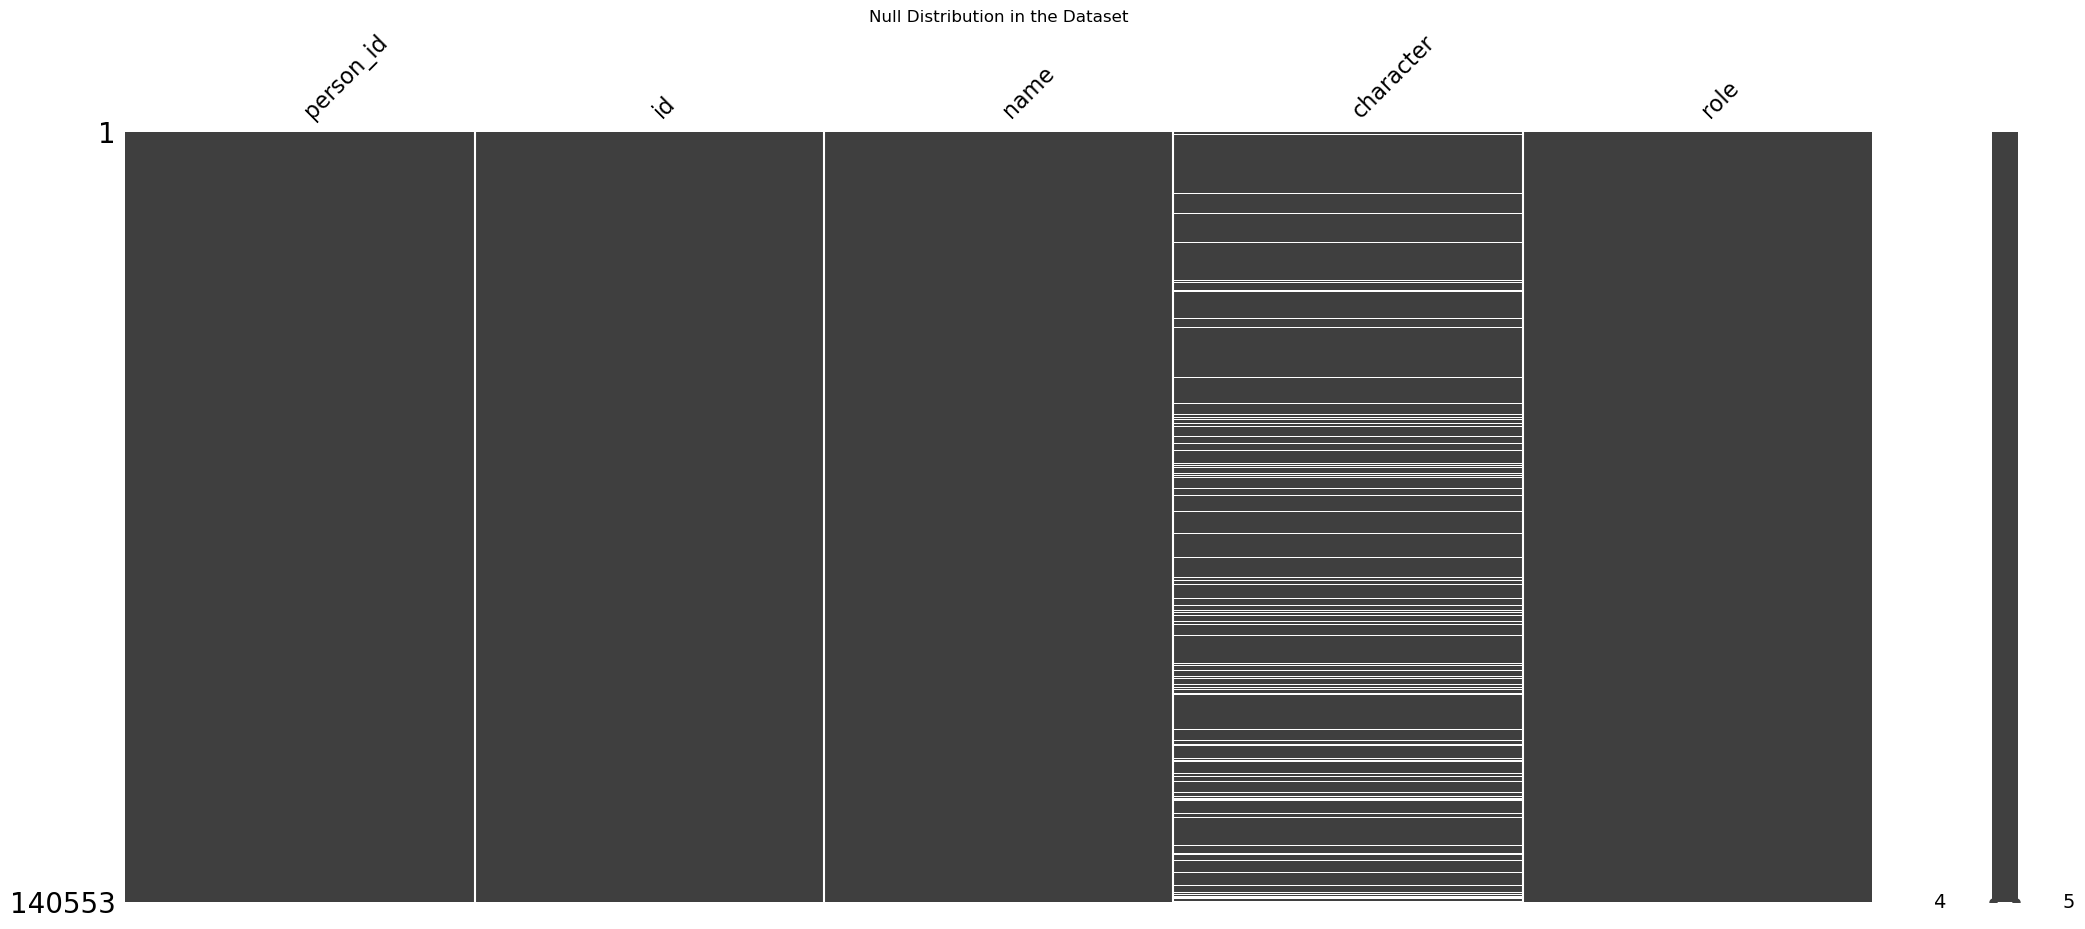

In [25]:
msno.matrix(df2) 
plt.title('Null Distribution in the Dataset')
plt.show()

In [26]:
df2.isnull().sum().sort_values(ascending=False)

character    17848
person_id        0
id               0
name             0
role             0
dtype: int64

In [27]:
round(df2.isnull().sum()/df2.shape[0]*100,2).sort_values(ascending=False)
# if the null percent is more than 60% it is ideal to drop that column

character    12.7
person_id     0.0
id            0.0
name          0.0
role          0.0
dtype: float64

In [28]:
df2["role"].value_counts()

ACTOR       131164
DIRECTOR      9389
Name: role, dtype: int64

In [29]:
# Top 10 actors
df2[df2["role"] == "ACTOR"]["name"].value_counts().head(10)

George 'Gabby' Hayes    53
Roy Rogers              48
Bess Flowers            45
Prakash Raj             41
Nassar                  40
Earl Dwire              36
Herman Hack             35
Eric Roberts            34
George Morrell          34
John Wayne              33
Name: name, dtype: int64

In [30]:
#Top 10 directors
df2[df2["role"] == "DIRECTOR"]["name"].value_counts().head(10)

Joseph Kane           45
Sam Newfield          38
Jay Chapman           33
Brian Volk-Weiss      27
Harry L. Fraser       20
William Nigh          20
Lesley Selander       19
Manny Rodriguez       19
Robert N. Bradbury    18
Robert F. Hill        13
Name: name, dtype: int64

## Movies Vs TV Shows

In [1]:
# checking the imbalance
go.Figure(data=[go.Pie(labels=df1.type.value_counts(normalize=True).index,values=df1.type.value_counts(normalize=True).values,hole=.5,title="Movies VS TV Shows")])

NameError: name 'go' is not defined

In [32]:
df1.type.value_counts()

MOVIE    9322
SHOW     1551
Name: type, dtype: int64

In [33]:
df1.age_certification.value_counts()

R           1338
PG-13        680
PG           584
TV-14        249
G            245
TV-MA        242
TV-PG        107
TV-Y          96
TV-G          68
TV-Y7         60
NC-17         14
TV-Y7-FV       5
Name: age_certification, dtype: int64

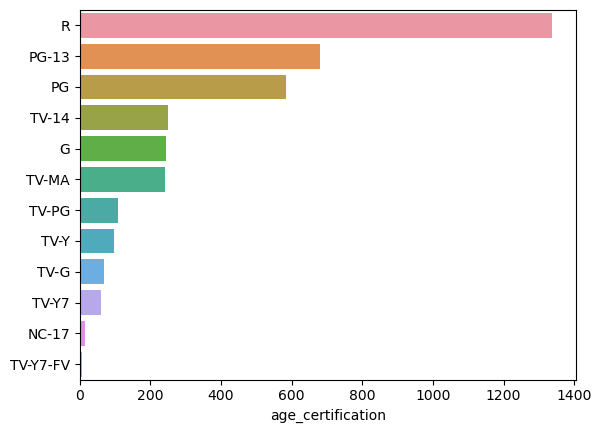

In [34]:
sns.barplot(x=df1.age_certification.value_counts(),y=df1.age_certification.value_counts().index,data=df1,orient="h")
plt.show()

* The highest count: R: Restricted -> This rating indicates that the content is intended for adults and may contain strong language, violence, nudity, and other adult themes. Children under 17 require accompanying parents or adult guardians.
<br><br>
* The second highest count: PG-13: Parents Strongly Cautioned -> This rating suggests that some material may be inappropriate for children under 13. Parents are urged to provide "strong caution" and decide whether the content is suitable for their children.
<br><br>
* The third largest count: PG: Parental Guidance -> This rating suggests that some material may not be suitable for children. Parents are urged to provide "parental guidance" and decide whether the content is appropriate for their children

In [35]:
# runtime -> length of the show/movie
df1.runtime.value_counts()

90     515
95     267
85     251
93     237
100    210
      ... 
199      1
940      1
216      1
0        1
300      1
Name: runtime, Length: 202, dtype: int64

In [36]:
# top 10 runtimes
df1.runtime.value_counts().head(10)

90     515
95     267
85     251
93     237
100    210
92     207
80     207
88     198
87     197
94     192
Name: runtime, dtype: int64

## Year Wise Count

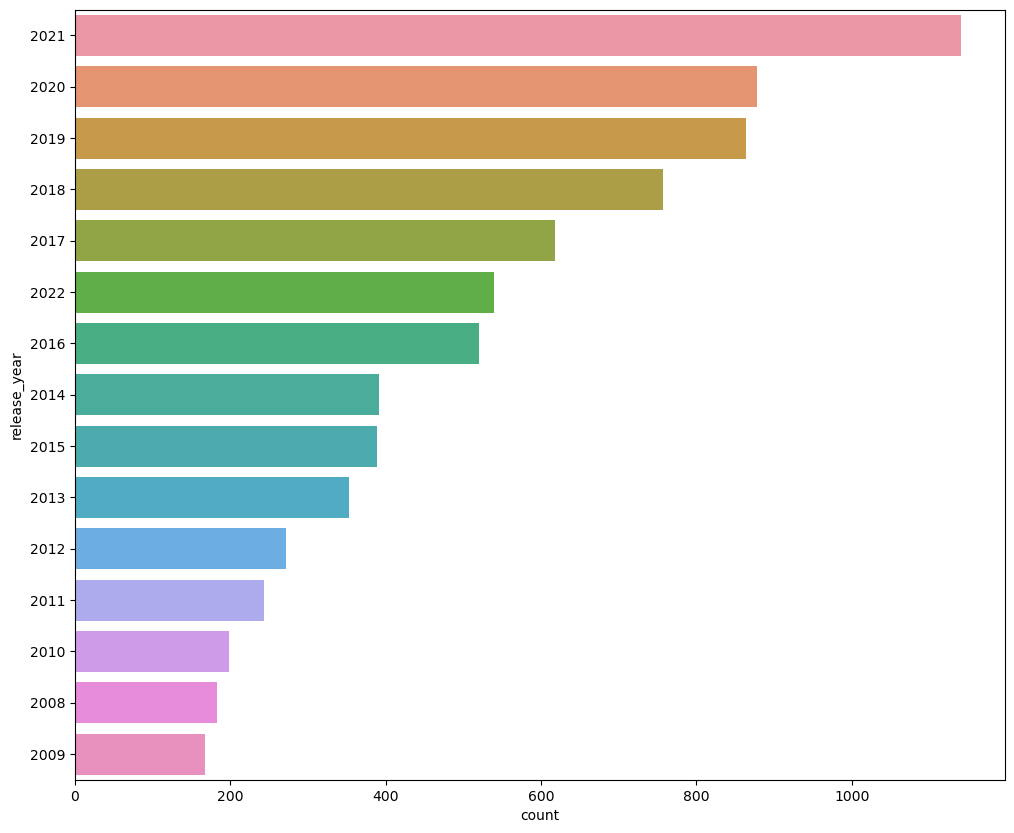

In [37]:
plt.figure(figsize=(12,10))
ax=sns.countplot(y="release_year",data=df1,order=df1.release_year.value_counts().index[0:15])

**Highest Releases in 2021 followed by 2020 and 2019**

In [38]:
sorted_df1 = df1.sort_values(by='tmdb_popularity', ascending=False)
sorted_df1

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
10827,tm1297718,Die Hart,MOVIE,"Follows a fictionalized version of Kevin Hart,...",2023,NaN,85,"['action', 'comedy', 'thriller']",['US'],NaN,tt26198528,4.7,2380.0,3187.531,6.293
9812,tm1188007,The Eighth Clause,MOVIE,"Kat and Borja appear to be a perfect couple, b...",2022,NaN,80,['thriller'],['MX'],NaN,NaN,NaN,NaN,2528.826,4.800
9151,tm1038597,Shotgun Wedding,MOVIE,Darcy and Tom gather their families for the ul...,2022,R,101,"['comedy', 'action', 'romance']","['DO', 'US']",NaN,tt9686790,5.4,26319.0,949.606,6.326
2025,ts21223,Pokémon,SHOW,"Join Ash accompanied by his partner Pikachu, a...",1997,TV-Y7,22,"['scifi', 'action', 'animation', 'comedy', 'fa...",['JP'],25.0,tt1306685,7.4,224.0,534.831,7.700
5122,ts36147,Lucifer,SHOW,"Bored and unhappy as the Lord of Hell, Lucifer...",2016,TV-14,47,"['scifi', 'crime', 'drama', 'fantasy']",['US'],6.0,tt4052886,8.1,331313.0,520.677,8.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10847,tm1306067,Tickets,MOVIE,Young lovers Crystal and Grant dream of gettin...,2023,NaN,90,['drama'],[],NaN,tt26660347,NaN,NaN,NaN,NaN
10854,tm1313262,"Tangos, tequilas, y algunas mentiras",MOVIE,NaN,2023,NaN,114,['comedy'],[],NaN,tt26919159,NaN,NaN,NaN,6.500
10855,tm1305427,Love Birds,MOVIE,Couples today come from different backgrounds ...,2023,NaN,129,"['romance', 'drama']",['IN'],NaN,tt23220186,7.4,33.0,NaN,NaN
10859,tm1262767,Cocoa,MOVIE,Two at odds sisters hit rock bottom in this li...,2023,NaN,94,['comedy'],['US'],NaN,tt22176604,6.9,10.0,NaN,NaN


In [39]:
# Top 10 titles based on tmdb_popularity

top_10_titles = sorted_df1['title'].head(10)
top_10_titles

10827                                 Die Hart
9812                         The Eighth Clause
9151                           Shotgun Wedding
2025                                   Pokémon
5122                                   Lucifer
3852                                     Suits
4368                                   Vikings
10820              Anne Rice's Mayfair Witches
10061    Prizefighter: The Life of Jem Belcher
6021                                  Creed II
Name: title, dtype: object

In [40]:
# least popular on tmdb_popularity
least_10_titles = sorted_df1['title'].tail(10)
print(least_10_titles)

10816                              Intentions
10817                                   Elzaz
10826              Nate Bargatze: Hello World
10833      LOL: Last One Laughing Netherlands
10846                                   Dudes
10847                                 Tickets
10854    Tangos, tequilas, y algunas mentiras
10855                              Love Birds
10859                                   Cocoa
10872                                Chapelle
Name: title, dtype: object


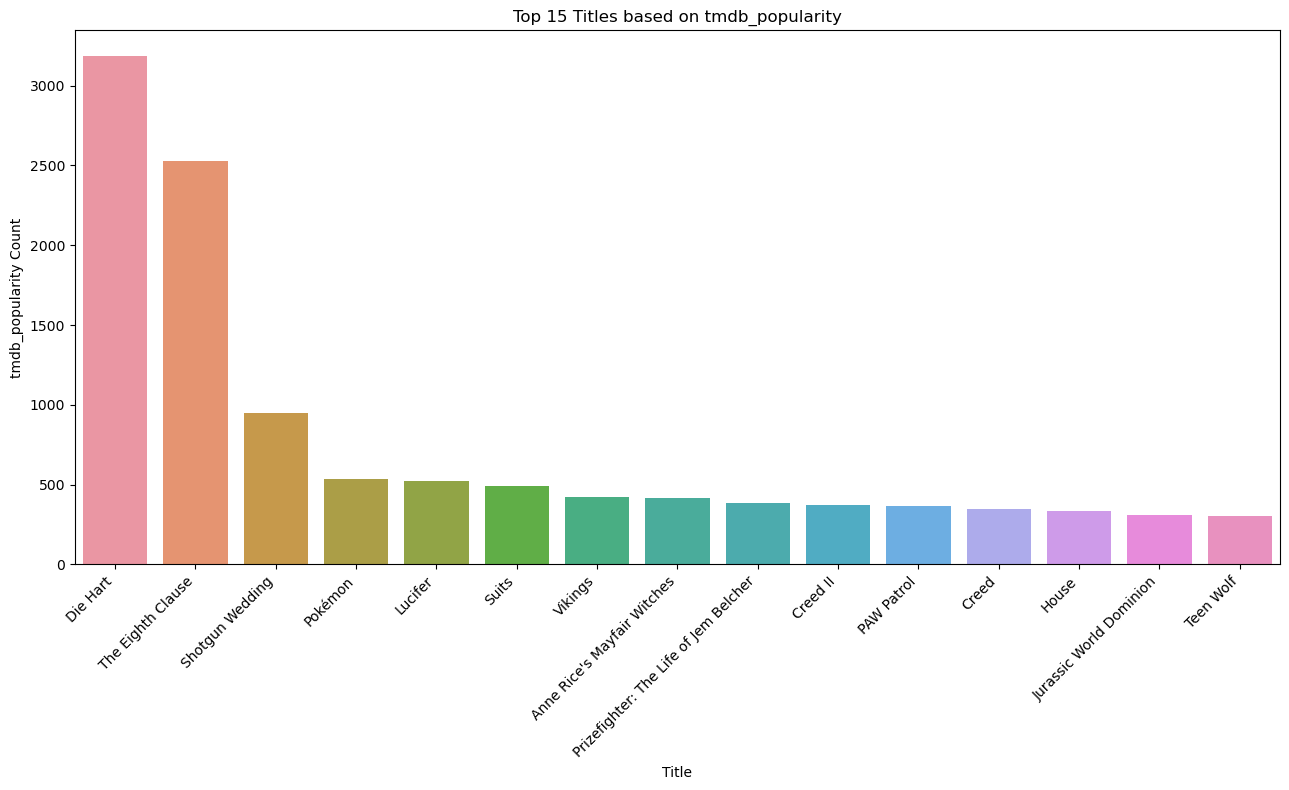

In [41]:
top_15_titles = sorted_df1['title'].head(15)
tmdb_popularity_counts = sorted_df1['tmdb_popularity'].head(15)

# Step 3: Create a Seaborn countplot for the top 15 titles with 'tmdb_popularity' as the count
plt.figure(figsize=(13, 8))
ax = sns.barplot(x=top_15_titles, y=df1.tmdb_popularity)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Title')
plt.ylabel('tmdb_popularity Count')
plt.title('Top 15 Titles based on tmdb_popularity')
plt.tight_layout()
plt.show()

## Handling missing values of Dataset Titles

In [42]:
round(df1.isnull().sum()/df1.shape[0]*100,2).sort_values(ascending=False)

seasons                 85.74
age_certification       66.08
tmdb_score              19.55
imdb_votes              10.30
imdb_score              10.19
imdb_id                  6.45
tmdb_popularity          5.25
description              1.32
id                       0.00
title                    0.00
type                     0.00
release_year             0.00
runtime                  0.00
genres                   0.00
production_countries     0.00
dtype: float64

In [43]:
round(df1.isnull().sum())

id                         0
title                      0
type                       0
description              144
release_year               0
age_certification       7185
runtime                    0
genres                     0
production_countries       0
seasons                 9322
imdb_id                  701
imdb_score              1108
imdb_votes              1120
tmdb_popularity          571
tmdb_score              2126
dtype: int64

In [44]:
df1.shape

(10873, 15)

In [45]:
df1['seasons'].fillna(0,inplace=True)
df1.to_csv('titles.csv', index=False)

In [46]:
round(df1.isnull().sum()/df1.shape[0]*100,2).sort_values(ascending=False)

age_certification       66.08
tmdb_score              19.55
imdb_votes              10.30
imdb_score              10.19
imdb_id                  6.45
tmdb_popularity          5.25
description              1.32
id                       0.00
title                    0.00
type                     0.00
release_year             0.00
runtime                  0.00
genres                   0.00
production_countries     0.00
seasons                  0.00
dtype: float64

In [47]:
df1['age_certification'].fillna('Not Available', inplace=True)
df1.to_csv('titles.csv', index=False)

In [48]:
round(df1.isnull().sum()/df1.shape[0]*100,2).sort_values(ascending=False)

tmdb_score              19.55
imdb_votes              10.30
imdb_score              10.19
imdb_id                  6.45
tmdb_popularity          5.25
description              1.32
id                       0.00
title                    0.00
type                     0.00
release_year             0.00
age_certification        0.00
runtime                  0.00
genres                   0.00
production_countries     0.00
seasons                  0.00
dtype: float64

In [49]:
mean_tmdb_score = df1['tmdb_score'].mean()
mean_imdb_votes = df1['imdb_votes'].mean()
mean_imdb_score = df1['imdb_score'].mean()

df1['tmdb_score'].fillna(mean_tmdb_score, inplace=True)
df1['imdb_votes'].fillna(mean_imdb_votes, inplace=True)
df1['imdb_score'].fillna(mean_imdb_score, inplace=True)

df1.to_csv('titles.csv', index=False)

In [50]:
round(df1.isnull().sum()/df1.shape[0]*100,2).sort_values(ascending=False)

imdb_id                 6.45
tmdb_popularity         5.25
description             1.32
id                      0.00
title                   0.00
type                    0.00
release_year            0.00
age_certification       0.00
runtime                 0.00
genres                  0.00
production_countries    0.00
seasons                 0.00
imdb_score              0.00
imdb_votes              0.00
tmdb_score              0.00
dtype: float64

In [51]:
round(df1.isnull().sum())

id                        0
title                     0
type                      0
description             144
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 701
imdb_score                0
imdb_votes                0
tmdb_popularity         571
tmdb_score                0
dtype: int64

In [52]:
df1['imdb_id'].fillna('Not Available', inplace=True)
df1['tmdb_popularity'].fillna('Not Available', inplace=True)
df1['description'].fillna('Not Available', inplace=True)

df1.to_csv('titles.csv', index=False)

In [53]:
round(df1.isnull().sum())

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

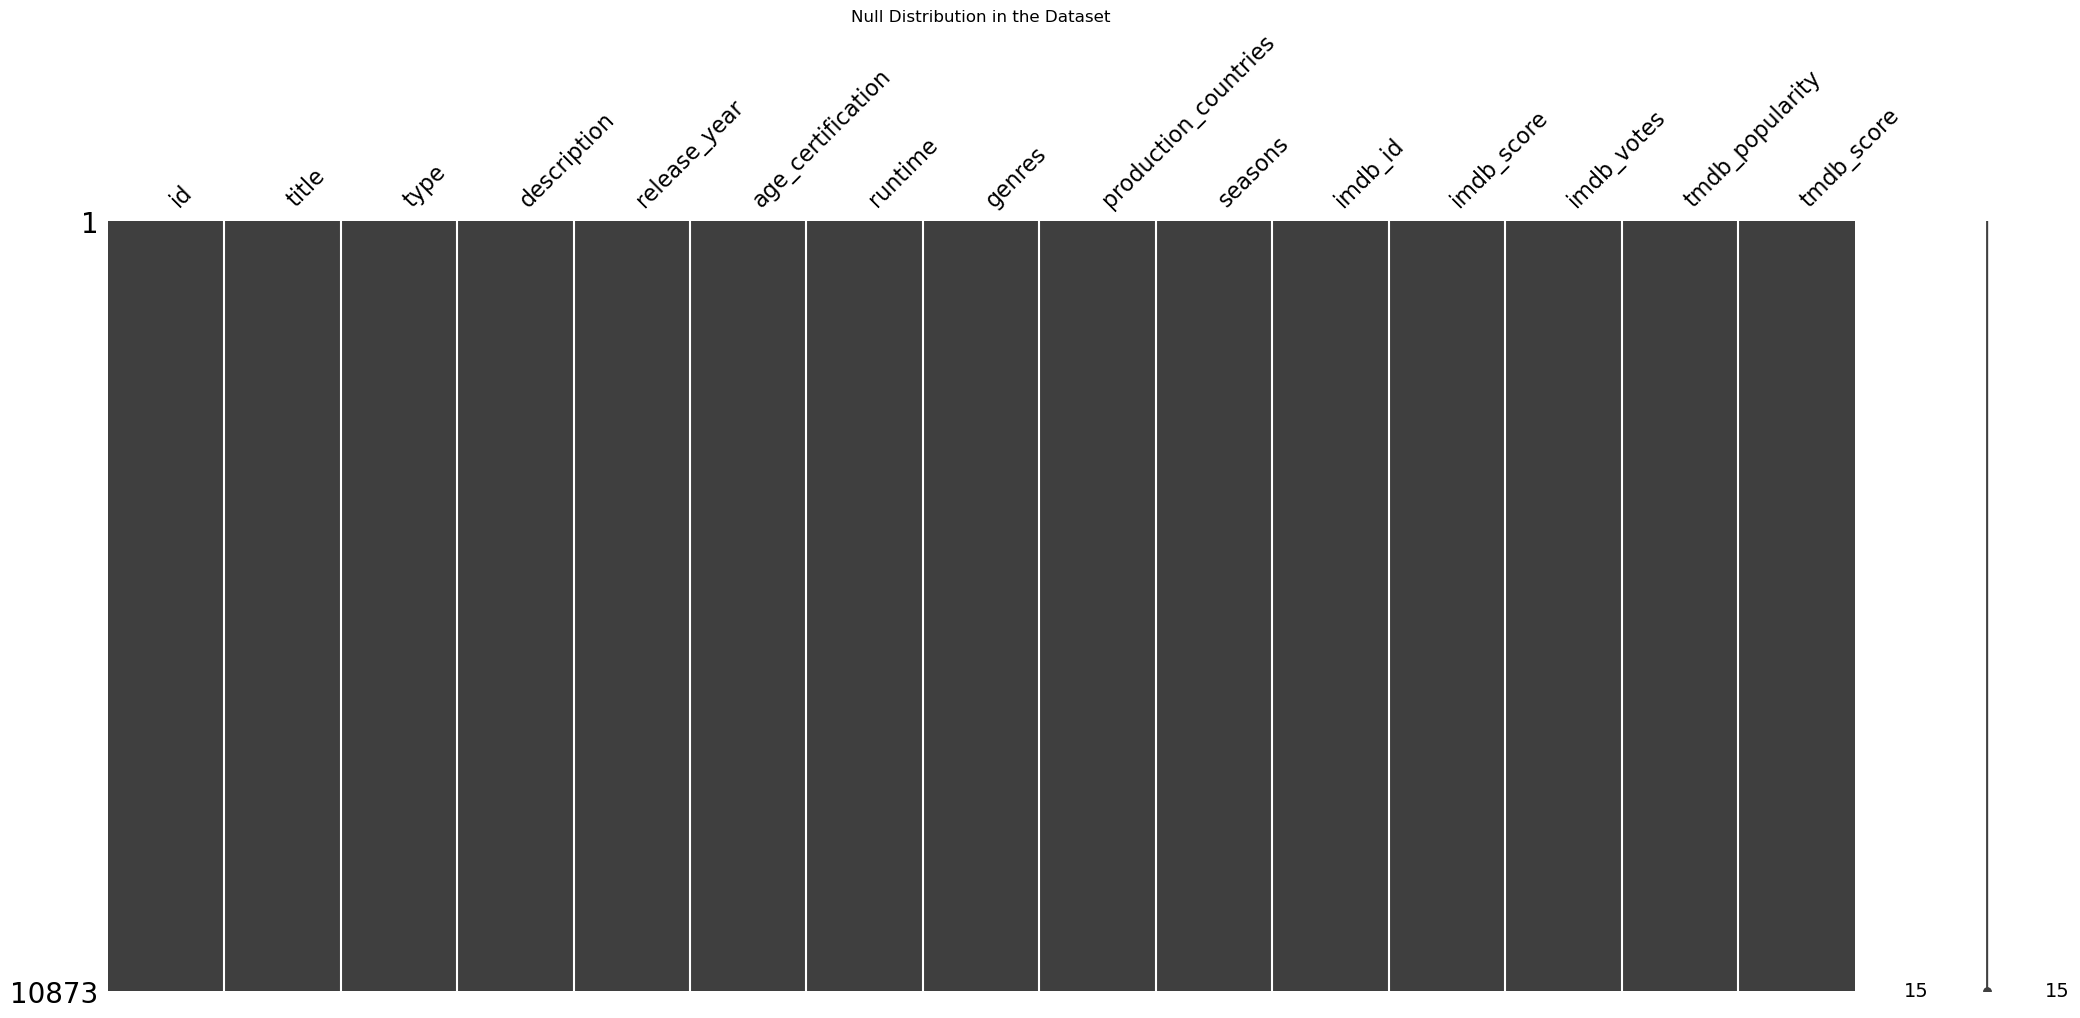

In [54]:
msno.matrix(df1) 
plt.title('Null Distribution in the Dataset')
plt.show()

## Handling missing values of Dataset Credits

In [55]:
round(df2.isnull().sum()/df1.shape[0]*100,2).sort_values(ascending=False)

character    164.15
person_id      0.00
id             0.00
name           0.00
role           0.00
dtype: float64

In [56]:
round(df2.isnull().sum())

person_id        0
id               0
name             0
character    17848
role             0
dtype: int64

In [57]:
df2['character'] = df2.apply(lambda row: 'Director' if row['role'] == 'DIRECTOR' else row['character'], axis=1)

In [58]:
df2.to_csv('credits.csv', index=False)

In [59]:
round(df2.isnull().sum()/df1.shape[0]*100,2).sort_values(ascending=False)

character    77.8
person_id     0.0
id            0.0
name          0.0
role          0.0
dtype: float64

In [60]:
df2['character'].fillna('Unknown', inplace=True)

In [61]:
df2.to_csv('credits.csv', index=False)

In [62]:
round(df2.isnull().sum()/df1.shape[0]*100,2).sort_values(ascending=False)

person_id    0.0
id           0.0
name         0.0
character    0.0
role         0.0
dtype: float64

In [63]:
round(df2.isnull().sum())

person_id    0
id           0
name         0
character    0
role         0
dtype: int64

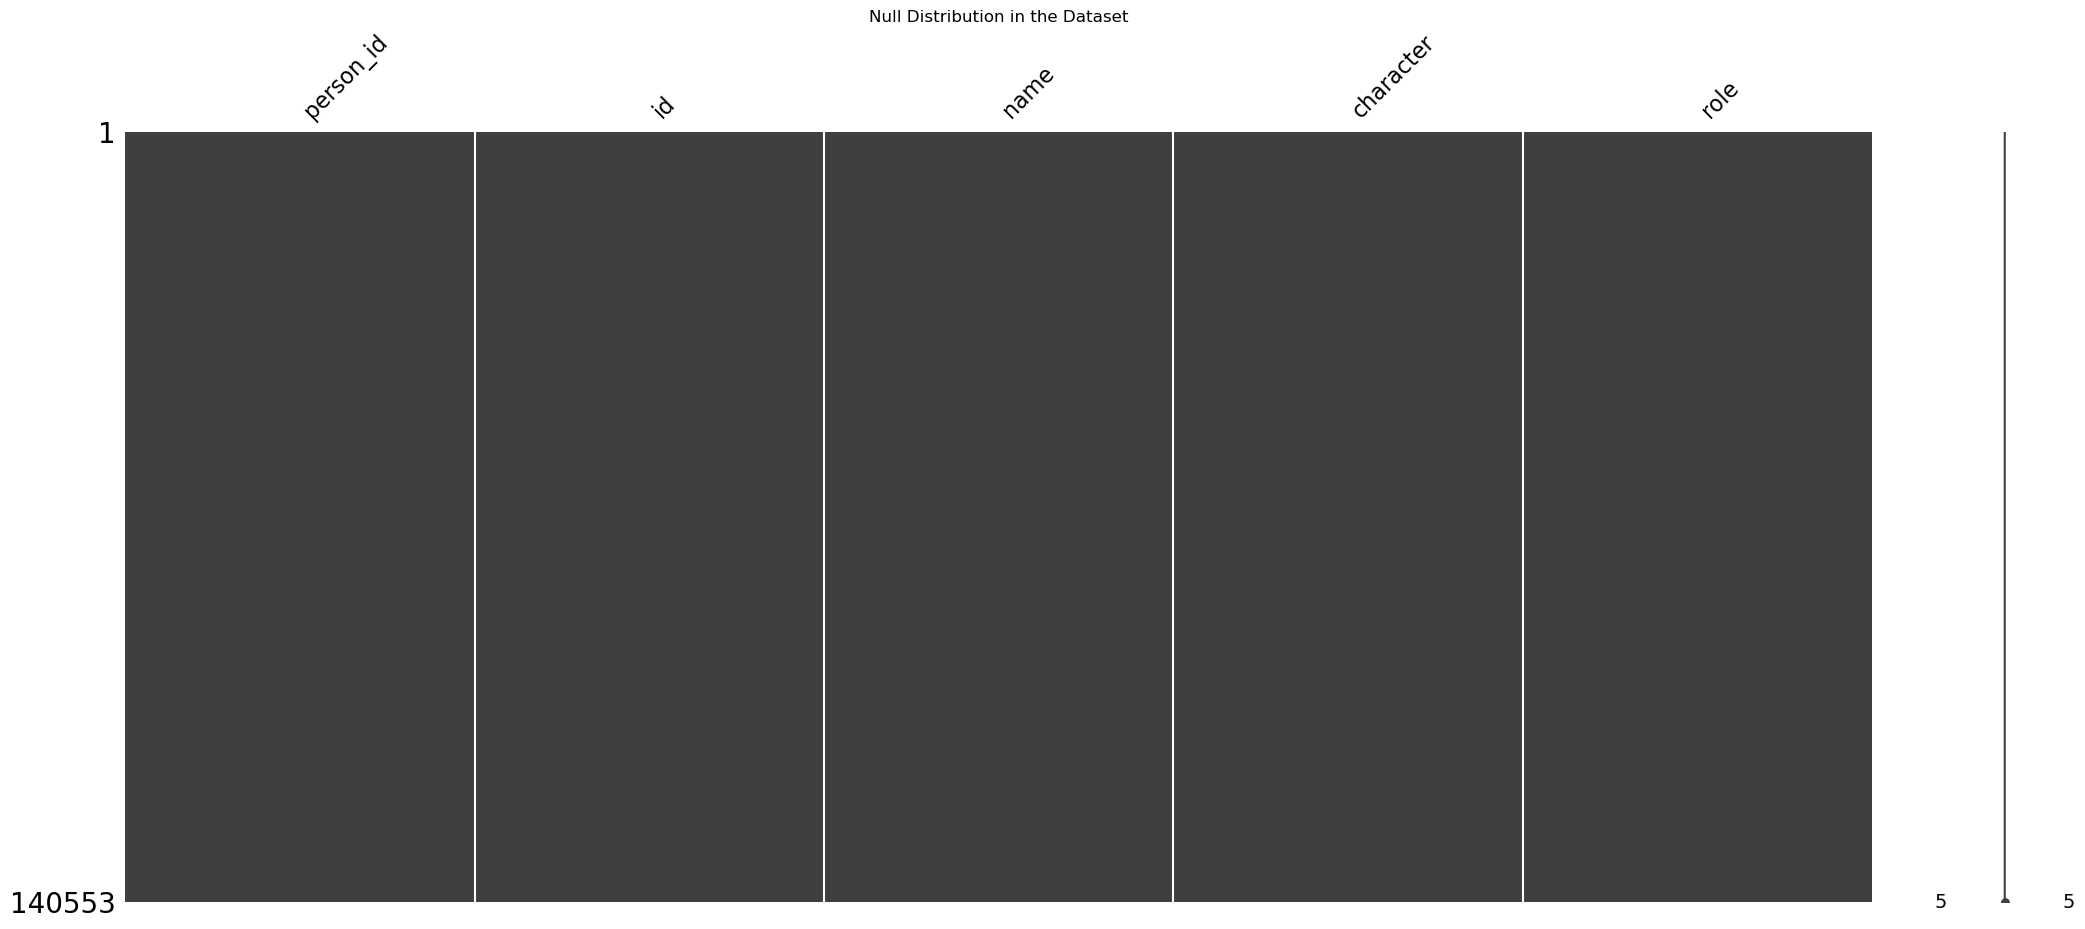

In [64]:
msno.matrix(df2) 
plt.title('Null Distribution in the Dataset')
plt.show()

In [65]:
df1['title']

0                     It's a Wonderful Life
1                                 Duck Soup
2                           His Girl Friday
3                         The Three Stooges
4                                 Red River
                        ...                
10868                                  Hunt
10869                    Ennalum Ente Aliya
10870    Anubhav Singh Bassi: Bas Kar Bassi
10871       Pinkfong! Summer in Wonderville
10872                              Chapelle
Name: title, Length: 10873, dtype: object

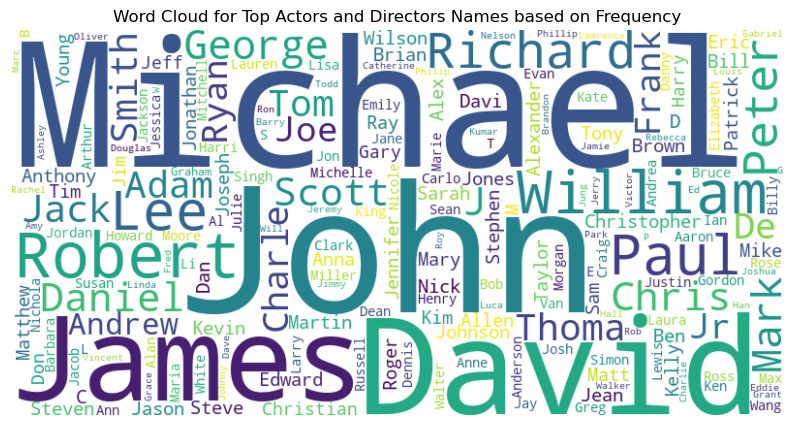

In [6]:
# A word cloud is a visual representation of text data, where the size of each word corresponds to 
# its frequency in the given text.
# insights into the most frequently mentioned actors and directors in the data.
from wordcloud import WordCloud

top_actors = df2[df2['role'] == 'ACTOR']['name'].value_counts()
top_directors = df2[df2['role'] == 'DIRECTOR']['name'].value_counts()
combined_data = ' '.join(list(top_actors.index) + list(top_directors.index))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_data)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top Actors and Directors Names based on Frequency')
plt.show()

In [67]:
movies_df=df1.loc[(df1['type']=="MOVIE")]
movies_df.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],0.0,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,Not Available,69,"['comedy', 'war']",['US'],0.0,tt0023969,7.8,60933.0,9.013,7.357


In [8]:
show_df=df1.loc[(df1['type']=="SHOW")]
show_df.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.6
5,ts37076,The Jack Benny Program,SHOW,Laugh along with funnyman Jack Benny as he bri...,1950,Not Available,30,['comedy'],['US'],21.0,tt0042116,8.6,1529.0,9.681,7.5


In [69]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9322 entries, 0 to 10872
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9322 non-null   object 
 1   title                 9322 non-null   object 
 2   type                  9322 non-null   object 
 3   description           9322 non-null   object 
 4   release_year          9322 non-null   int64  
 5   age_certification     9322 non-null   object 
 6   runtime               9322 non-null   int64  
 7   genres                9322 non-null   object 
 8   production_countries  9322 non-null   object 
 9   seasons               9322 non-null   float64
 10  imdb_id               9322 non-null   object 
 11  imdb_score            9322 non-null   float64
 12  imdb_votes            9322 non-null   float64
 13  tmdb_popularity       9322 non-null   object 
 14  tmdb_score            9322 non-null   float64
dtypes: float64(4), int64

In [70]:
movies_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_score
count,9322.000000,9322.000000,9322.0,9322.000000,9.322000e+03,9322.000000
mean,2002.587642,94.106844,0.0,5.800836,8.879163e+03,5.838292
std,26.144222,28.872489,0.0,1.235368,4.787785e+04,1.288479
min,1912.000000,4.000000,0.0,1.100000,5.000000e+00,0.500000
25%,1999.000000,80.000000,0.0,5.100000,1.420000e+02,5.200000
50%,2015.000000,91.000000,0.0,5.970558,6.390000e+02,5.977729
75%,2019.000000,105.000000,0.0,6.600000,4.962750e+03,6.500000
max,2023.000000,940.000000,0.0,9.900000,2.081757e+06,10.000000


In [71]:
#shortest Movie
shortest_movie=movies_df.loc[(movies_df['runtime']==np.min(movies_df.runtime))]
shortest_movie

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5966,tm414289,Two Wrongs,MOVIE,A short film about revenge and gangs in the st...,2016,Not Available,4,"['action', 'thriller', 'drama']",['US'],0.0,Not Available,5.970558,8973.231724,0.6,5.0


In [72]:
#Longest Movie
longest_movie=movies_df.loc[(movies_df['runtime']==np.max(movies_df.runtime))]
longest_movie

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1734,tm127342,Once Bitten,MOVIE,"Mark wants to lose his virginity, but his girl...",1985,PG-13,940,"['comedy', 'horror', 'drama', 'fantasy']",['US'],0.0,tt0089730,5.5,15386.0,10.365,5.8


In [73]:
#Movies with duration of more than or equal 100 min
movie=movies_df.loc[(movies_df['runtime']>=100)]
movie

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],0.0,tt0038650,8.6,467766.0,27.611,8.261000
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,Not Available,133,"['western', 'drama', 'romance', 'action']",['US'],0.0,tt0040724,7.8,32210.0,12.4,7.400000
6,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1947,Not Available,171,"['drama', 'romance', 'war']",['US'],0.0,tt0038351,8.1,66209.0,16.056,7.838000
7,tm88469,The Bishop's Wife,MOVIE,"An Episcopal Bishop, Henry Brougham, has been ...",1948,Not Available,105,"['comedy', 'drama', 'fantasy', 'romance']",['US'],0.0,tt0039190,7.6,19165.0,9.671,7.113000
8,tm82560,The Little Foxes,MOVIE,"The ruthless, moneyed Hubbard clan lives in, a...",1941,Not Available,115,"['drama', 'romance']",['US'],0.0,tt0033836,7.9,12337.0,7.215,7.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10855,tm1305427,Love Birds,MOVIE,Couples today come from different backgrounds ...,2023,Not Available,129,"['romance', 'drama']",['IN'],0.0,tt23220186,7.4,33.0,Not Available,5.977729
10860,tm1294232,Thankam,MOVIE,Muthu and Kannan are Gold Agents from Thrissur...,2023,Not Available,145,"['drama', 'crime']",['IN'],0.0,tt11086194,7.3,2868.0,5.722,8.800000
10862,tm948025,Hard Luck Love Song,MOVIE,"Jesse, a charismatic but down on his luck trou...",2023,R,104,"['drama', 'thriller', 'romance', 'music']",['US'],0.0,tt8709338,5.3,444.0,4.299,5.300000
10868,tm1292884,Hunt,MOVIE,"Arjun is the ACP of Hyderabad, who gets involv...",2023,Not Available,129,"['action', 'thriller', 'crime']",['IN'],0.0,tt21946058,5.8,1269.0,4.403,4.300000


In [74]:
show_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_score
count,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000
mean,2013.034172,36.357189,2.661509,6.990640,9538.612683,6.815789
std,11.797298,17.578104,3.719633,1.143513,36155.738353,1.453452
min,1934.000000,0.000000,1.000000,1.100000,5.000000,0.800000
25%,2011.000000,23.000000,1.000000,6.050000,123.500000,5.977729
50%,2017.000000,35.000000,1.000000,7.100000,873.000000,6.900000
75%,2020.000000,48.000000,3.000000,7.800000,8973.231724,7.800000
max,2023.000000,165.000000,53.000000,9.700000,544091.000000,10.000000


In [14]:
show_df.runtime.value_counts(ascending=False)

45     75
24     73
23     70
44     67
22     65
       ..
107     1
108     1
0       1
82      1
165     1
Name: runtime, Length: 93, dtype: int64

In [76]:
#show with the highest no of seasons
longest_shows=show_df.loc[(show_df['seasons']>=13)]
longest_shows

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
5,ts37076,The Jack Benny Program,SHOW,Laugh along with funnyman Jack Benny as he bri...,1950,Not Available,30,['comedy'],['US'],21.0,tt0042116,8.6,1529.0,9.681,7.500
247,ts55748,What's My Line?,SHOW,Four panelists must determine guests' occupati...,1950,Not Available,30,"['reality', 'family']",['US'],18.0,tt1036980,8.5,1658.0,45.113,7.200
940,ts42867,Mister Rogers' Neighborhood,SHOW,Mister Rogers' Neighborhood is an American chi...,1968,TV-Y,28,"['family', 'fantasy', 'music']",['US'],31.0,tt0062588,8.7,9043.0,36.06,4.845
990,ts46032,Gardeners' World,SHOW,Gardeners' World is a long-running BBC Televis...,1968,TV-G,50,['documentation'],['GB'],23.0,tt0260618,8.4,263.0,3.797,8.500
1015,ts21689,NOVA,SHOW,PBS' premier science series helps viewers of a...,1974,TV-PG,60,['documentation'],['US'],50.0,tt0206501,8.7,2869.0,68.66,7.000
1149,ts5220,The Adventures of Ozzie and Harriet,SHOW,The Adventures of Ozzie and Harriet is an Amer...,1952,TV-G,30,"['comedy', 'family', 'drama']",['US'],14.0,tt0044230,7.4,1449.0,9.593,5.500
1707,ts39067,Reading Rainbow,SHOW,Journey to exciting places and build a lasting...,1983,TV-Y,28,['family'],['US'],21.0,tt0085075,8.4,4839.0,5.839,8.500
1713,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['animation', 'family', 'fantasy', 'music', 'd...",['GB'],24.0,tt13274684,6.5,5528.0,72.342,6.483
1748,ts2760,Fireman Sam,SHOW,Follow the adventures of fireman Sam and his c...,1987,TV-Y,10,"['comedy', 'animation', 'family', 'crime', 'eu...",['GB'],13.0,tt0329829,6.1,1875.0,50.615,6.826


In [77]:
longest_shows.age_certification.value_counts()

Not Available    7
TV-Y             6
TV-PG            5
TV-G             4
TV-14            3
TV-Y7            3
TV-MA            1
Name: age_certification, dtype: int64

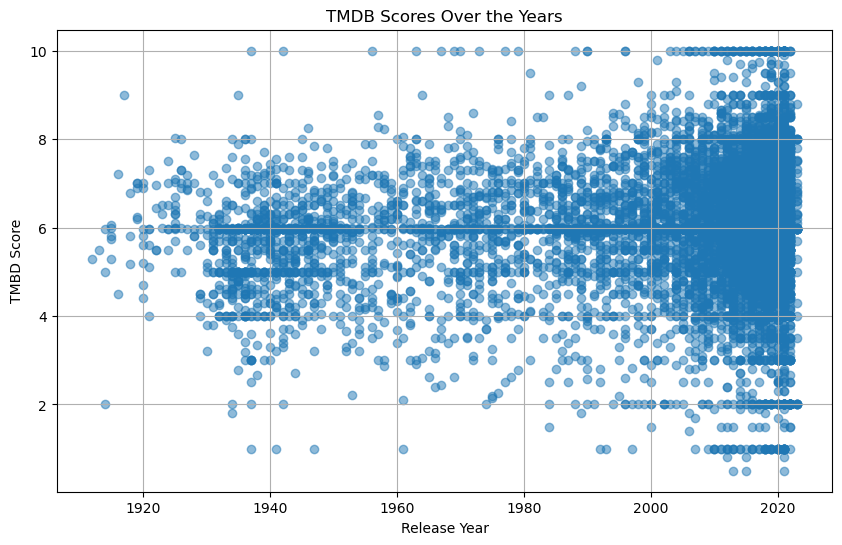

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['release_year'], df1['tmdb_score'], alpha=0.5)
plt.xlabel('Release Year')
plt.ylabel('TMBD Score')
plt.title('TMDB Scores Over the Years')
plt.grid(True)
plt.show()

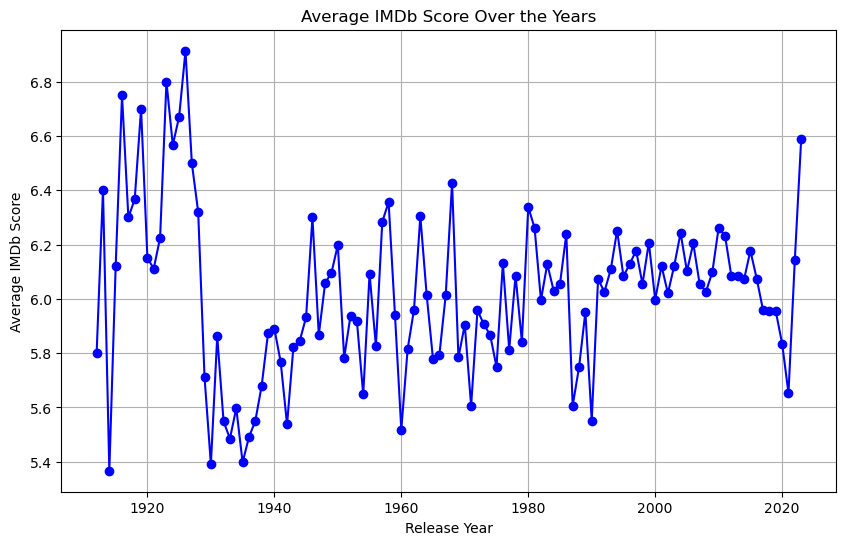

In [79]:
average_imdb_scores = df1.groupby('release_year')['imdb_score'].mean()

# Create a line plot for 'release_year' vs average 'imdb_score'
plt.figure(figsize=(10, 6))
average_imdb_scores.plot(marker='o', linestyle='-', color='b')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score Over the Years')
plt.grid(True)
plt.show()

In [80]:
df1.groupby('type').age_certification.value_counts()

type   age_certification
MOVIE  Not Available        6461
       R                    1338
       PG-13                 680
       PG                    584
       G                     245
       NC-17                  14
SHOW   Not Available         724
       TV-14                 249
       TV-MA                 242
       TV-PG                 107
       TV-Y                   96
       TV-G                   68
       TV-Y7                  60
       TV-Y7-FV                5
Name: age_certification, dtype: int64

In [81]:
df1['age_certification'].replace('Not Available', float('nan'), inplace=True)


In [82]:
type_age=(df1
 .groupby('type')
 .age_certification
 .value_counts() 
 .unstack()# Reshape the data, making age certifications as columns and 'type' as index
 .fillna(0)# Fill any NaN (missing) values with 0
)
              

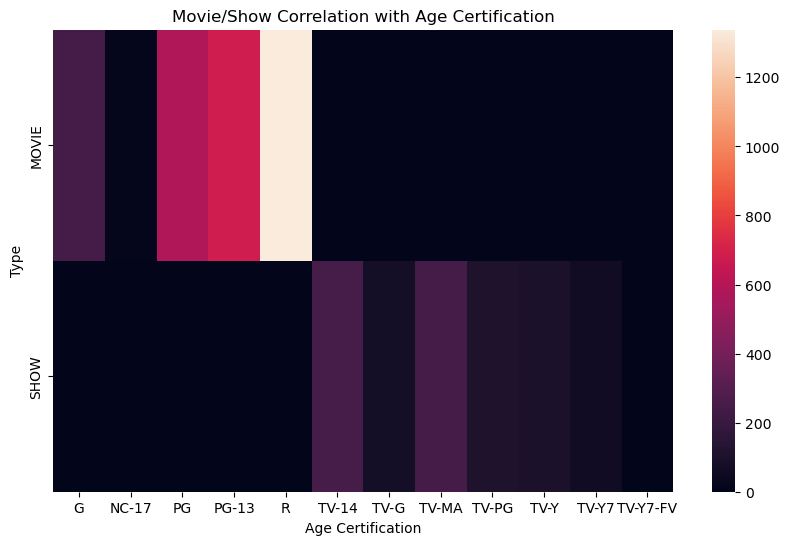

In [83]:
plt.figure(figsize=(10, 6))
sns.heatmap(type_age);
plt.xlabel('Age Certification')
plt.ylabel('Type')
plt.title('Movie/Show Correlation with Age Certification')
plt.show()

* 1: A perfect positive correlation (as one variable increases, the other increases proportionally).
* 0: No correlation (no linear relationship between the variables).
* -1: A perfect negative correlation (as one variable increases, the other decreases proportionally).

In [84]:
df1.corr()#pair-wise corelation between numeric columns 

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_score
release_year,1.000000,0.058485,0.017425,0.023165,0.007246,0.093536
runtime,0.058485,1.000000,-0.340878,-0.091428,0.095931,-0.049819
seasons,0.017425,-0.340878,1.000000,0.195561,0.026778,0.159361
imdb_score,0.023165,-0.091428,0.195561,1.000000,0.158924,0.487413
imdb_votes,0.007246,0.095931,0.026778,0.158924,1.000000,0.138549
tmdb_score,0.093536,-0.049819,0.159361,0.487413,0.138549,1.000000


<AxesSubplot:>

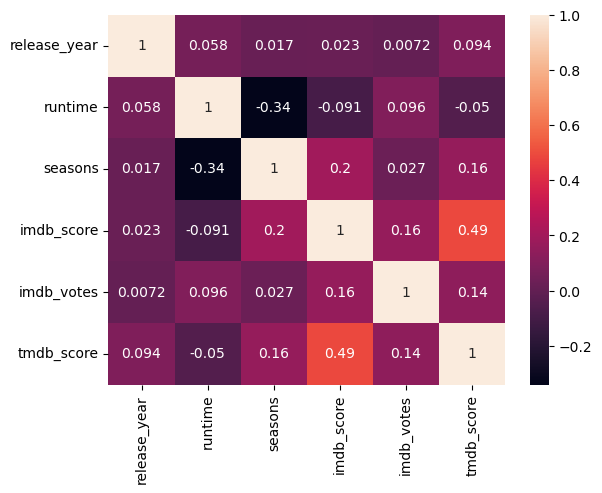

In [85]:
sns.heatmap(df1.corr(),annot=True)

<AxesSubplot:>

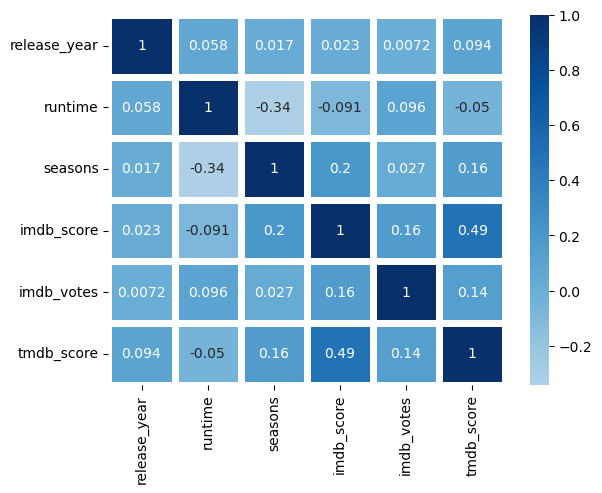

In [13]:
sns.heatmap(df1.corr(),center=0,annot=True,linewidth=5,cmap='Blues')
#  pairwise correlation of all numeric columns in a DataFrame

In [4]:
# Sentiment analysis, also known as opinion mining
# the goal of sentiment analysis is to classify the text as positive, negative, neutral, or sometimes even more fine-grained emotions like joy, sadness, anger, etc.

dfx=df1[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig= px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment Analysis of content on Amazon Prime")
fig.show()